In [1]:
using LinearAlgebra;
import PyPlot as plt;
import SymPy as sp;
plt.rc("text", usetex=true);
images_path = ".//images";

# Reference Quadrature Element

In [2]:
local_coords = [
    -1. -1.;
    1. -1.;
    1. 1.;
    -1. 1.
];

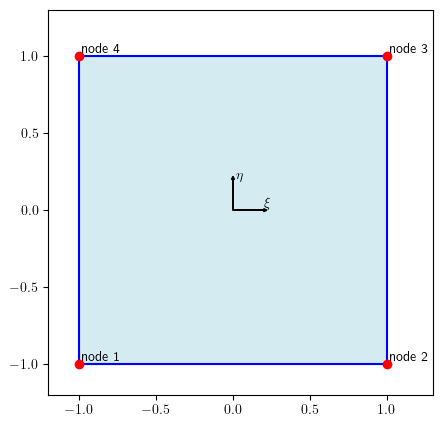

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [3]:
reference_quad_elem_figure = plt.figure(figsize=(8,5), facecolor="white");
reference_quad_elem_axes = reference_quad_elem_figure.add_subplot(1, 1, 1);

reference_quad_elem_axes.set_aspect("equal");
# larger bounding box
reference_quad_elem_axes.set_xlim(-1.2, 1.3);
reference_quad_elem_axes.set_ylim(-1.2, 1.3);

for i_node in 1:4
    reference_quad_elem_axes.scatter(local_coords[i_node, 1], local_coords[i_node, 2], color="red", zorder=10);
    reference_quad_elem_axes.text(local_coords[i_node, 1]+0.02, local_coords[i_node, 2]+0.02, "node $i_node", fontsize=10);
end;

for i_node in 1:4
    next_node_index = mod(i_node, 4) + 1;
    reference_quad_elem_axes.plot(
        [local_coords[i_node, 1], local_coords[next_node_index, 1]],
        [local_coords[i_node, 2], local_coords[next_node_index, 2]],
        color="blue"
    );
end

reference_quad_elem_axes.fill(
    local_coords[:, 1],
    local_coords[:, 2],
    color="lightblue",
    alpha=0.5
);

reference_quad_elem_axes.arrow(0, 0, 0.2, 0, head_width=0.02, head_length=0.02, fc="k", ec="k");
reference_quad_elem_axes.text(0.2, 0.02, raw"$\xi$", fontsize=10);
reference_quad_elem_axes.arrow(0, 0, 0, 0.2, head_width=0.02, head_length=0.02, fc="k", ec="k");
reference_quad_elem_axes.text(0.02, 0.2, raw"$\eta$", fontsize=10);

display(reference_quad_elem_figure)

reference_quad_elem_figure.show()

# Transformation

$$
\begin{bmatrix}
x\\ y
\end{bmatrix}=
\begin{bmatrix}
A_0 + A_1\xi + A_2\eta + A_3\xi\eta\\
B_0 + B_1\xi + B_2\eta + B_3\xi\eta
\end{bmatrix}
$$

Thus:

$$
\begin{bmatrix}
x_1 \\ x_2 \\ x_3 \\ x_4
\end{bmatrix}=
\begin{bmatrix}
1 & \xi_1 & \eta_1 & \xi_1\eta_1\\
1 & \xi_2 & \eta_2 & \xi_2\eta_2\\
1 & \xi_3 & \eta_3 & \xi_3\eta_3\\
1 & \xi_4 & \eta_4 & \xi_4\eta_4
\end{bmatrix}
\begin{bmatrix}
A_0 \\ A_1 \\ A_2 \\ A_3
\end{bmatrix}
$$

In [5]:
x_1, y_1 = sp.symbols("x_1, y_1");
x_2, y_2 = sp.symbols("x_2, y_2");
x_3, y_3 = sp.symbols("x_3, y_3");
x_4, y_4 = sp.symbols("x_4, y_4");
xi, eta = sp.symbols("xi, eta");

In [6]:
n_nodes = size(local_coords, 1);
coeff_to_node = zeros(n_nodes, n_nodes);
for i = 1:n_nodes
    coeff_to_node[i, :] = [1., local_coords[i, 1], local_coords[i, 2], local_coords[i, 1]*local_coords[i, 2]];
end;
coeff_to_node

4×4 Matrix{Float64}:
 1.0  -1.0  -1.0   1.0
 1.0   1.0  -1.0  -1.0
 1.0   1.0   1.0   1.0
 1.0  -1.0   1.0  -1.0

In [7]:
node_to_coeff = inv(coeff_to_node);
node_to_coeff

4×4 Matrix{Float64}:
  0.25   0.25  0.25   0.25
 -0.25   0.25  0.25  -0.25
 -0.25  -0.25  0.25   0.25
  0.25  -0.25  0.25  -0.25

In [12]:
A_0, A_1, A_2, A_3 = Rational.(node_to_coeff) * [x_1, x_2, x_3, x_4];
x = A_0 + A_1*xi + A_2*eta + A_3*xi*eta;
x = x.simplify();
x

η⋅ξ⋅(x₁ - x₂ + x₃ - x₄)   η⋅(x₁ + x₂ - x₃ - x₄)   x₁   x₂   x₃   x₄   ξ⋅(x₁ - 
─────────────────────── - ───────────────────── + ── + ── + ── + ── - ────────
           4                        4             4    4    4    4            

x₂ - x₃ + x₄)
─────────────
  4          

In [13]:
B_0, B_1, B_2, B_3 = Rational.(node_to_coeff) * [y_1, y_2, y_3, y_4];
y = B_0 + B_1*xi + B_2*eta + B_3*xi*eta;
y = y.simplify();
y

η⋅ξ⋅(y₁ - y₂ + y₃ - y₄)   η⋅(y₁ + y₂ - y₃ - y₄)   ξ⋅(y₁ - y₂ - y₃ + y₄)   y₁  
─────────────────────── - ───────────────────── - ───────────────────── + ── +
           4                        4                       4             4   

 y₂   y₃   y₄
 ── + ── + ──
 4    4    4 

In [14]:
jacobian_matrix = sp.Matrix([x y]).jacobian(sp.Matrix([xi eta]));
jacobian_matrix

2×2 Matrix{SymPy.Sym}:
 eta*(x_1 - x_2 + x_3 - x_4)/4 - x_1/4 + x_2/4 + x_3/4 - x_4/4  …  -x_1/4 - x_2/4 + x_3/4 + x_4/4 + xi*(x_1 - x_2 + x_3 - x_4)/4
 eta*(y_1 - y_2 + y_3 - y_4)/4 - y_1/4 + y_2/4 + y_3/4 - y_4/4      xi*(y_1 - y_2 + y_3 - y_4)/4 - y_1/4 - y_2/4 + y_3/4 + y_4/4

In [16]:
jacobian_det = jacobian_matrix.det();
jacobian_det = jacobian_det.simplify();
jacobian_det
# println(sp.latex(jacobian_det))

  η⋅x₁⋅y₂   η⋅x₁⋅y₃   η⋅x₂⋅y₁   η⋅x₂⋅y₄   η⋅x₃⋅y₁   η⋅x₃⋅y₄   η⋅x₄⋅y₂   η⋅x₄⋅y
- ─────── + ─────── + ─────── - ─────── - ─────── + ─────── + ─────── - ──────
     8         8         8         8         8         8         8         8  

₃   x₁⋅ξ⋅y₃   x₁⋅ξ⋅y₄   x₁⋅y₂   x₁⋅y₄   x₂⋅ξ⋅y₃   x₂⋅ξ⋅y₄   x₂⋅y₁   x₂⋅y₃   x₃
─ - ─────── + ─────── + ───── - ───── + ─────── - ─────── - ───── + ───── + ──
       8         8        8       8        8         8        8       8       

⋅ξ⋅y₁   x₃⋅ξ⋅y₂   x₃⋅y₂   x₃⋅y₄   x₄⋅ξ⋅y₁   x₄⋅ξ⋅y₂   x₄⋅y₁   x₄⋅y₃
───── - ─────── - ───── + ───── - ─────── + ─────── + ───── - ─────
 8         8        8       8        8         8        8       8  

Jacobi matrix:

$$
J=
\begin{bmatrix}
\frac{\partial x}{\partial \xi} & \frac{\partial x}{\partial \eta}\\
\frac{\partial y}{\partial \xi} & \frac{\partial y}{\partial \eta}
\end{bmatrix}=
\begin{bmatrix}

$$

In [22]:
sp.latex.(jacobian_matrix)

2×2 Matrix{String}:
 "\\frac{\\eta \\left(x_{1} - x_{2} " ⋯ 67 bytes ⋯ "rac{x_{3}}{4} - \\frac{x_{4}}{4}"  …  "- \\frac{x_{1}}{4} - \\frac{x_{2}" ⋯ 68 bytes ⋯ "_{2} + x_{3} - x_{4}\\right)}{4}"
 "\\frac{\\eta \\left(y_{1} - y_{2} " ⋯ 67 bytes ⋯ "rac{y_{3}}{4} - \\frac{y_{4}}{4}"     "\\frac{\\xi \\left(y_{1} - y_{2} +" ⋯ 66 bytes ⋯ "rac{y_{3}}{4} + \\frac{y_{4}}{4}"